In [70]:
import matplotlib . pyplot as plt
from sklearn . decomposition import PCA
from sklearn . datasets import load_iris
from sklearn . neighbors import KNeighborsClassifier

In [71]:
# Load the Iris data .
data = load_iris ()
inputs = data . data
targets = data . target


In [72]:
# Project the data into two dimensions using PCA .
pca = PCA ( n_components =2)
compressed = pca . fit_transform ( inputs )

In [73]:
# Train the classifier .
classifier = KNeighborsClassifier ( n_neighbors = 1 )
classifier . fit ( inputs , targets )
classifiedData = classifier . predict ( inputs )

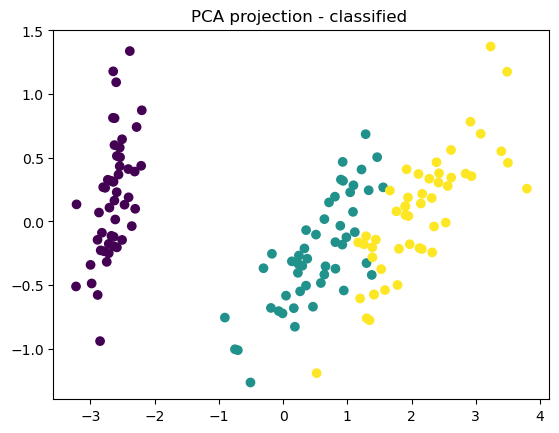

In [74]:
plt . figure ()
plt . scatter ( compressed [:,0], compressed [:,1], c= classifiedData )
plt . title ("PCA projection - classified ")
plt . savefig ("iris_pca_classified .png",bbox_inches ="tight")
plt . show ()

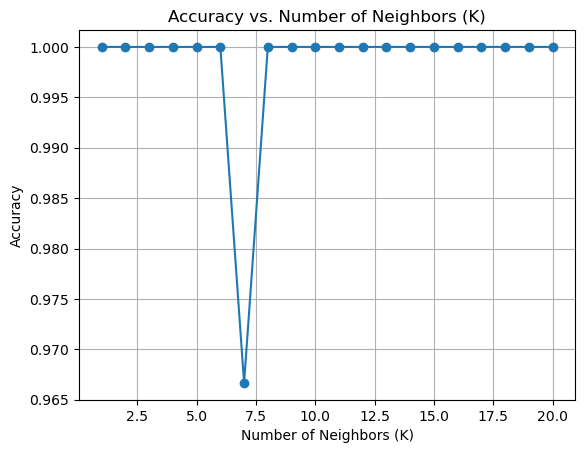

Optimal K: 1


In [75]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris data
data = load_iris()
inputs = data.data
targets = data.target

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
compressed = pca.fit_transform(inputs)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# Initialize variables to store results
k_values = range(1, 21)  # Test K values from 1 to 20
accuracy_scores = []

# Loop over different values of K
for k in k_values:
    # Train the KNN classifier
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
   
    # Make predictions on the validation set
    val_predictions = classifier.predict(X_val)
   
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_val, val_predictions)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the optimal value of K with the highest accuracy
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal K: {optimal_k}")


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

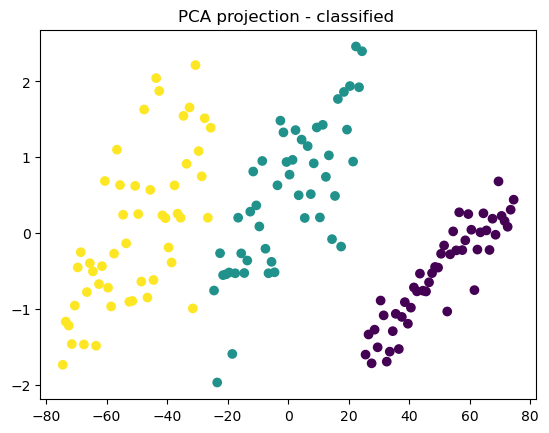

In [88]:
import matplotlib . pyplot as plt
import pandas
from sklearn . decomposition import PCA
from sklearn . datasets import load_iris
from sklearn . neighbors import KNeighborsClassifier

# Load the Iris data .
data = pandas . read_csv ("Iris.csv")
print ( data )

# Extract the inputs .
inputs = data . values [:,:-1]. astype ( float )
# Extract the targets - convert to numerical values to help with
# colouring when we plot the results .
cls = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
targets = [ cls . index (c) for c in data . values [:,-1]. astype ( str )]
targets = np . array ( targets )


# Project the data into two dimensions using PCA .
pca = PCA ( n_components =2)
compressed = pca . fit_transform ( inputs )

# Train the classifier .
classifier = KNeighborsClassifier ( n_neighbors = 1 )
classifier . fit ( inputs , targets )
classifiedData = classifier . predict ( inputs )

plt . figure ()
plt . scatter ( compressed [:,0], compressed [:,1], c= classifiedData )
plt . title ("PCA projection - classified ")
plt . savefig ("iris_pca_classified .png",bbox_inches ="tight")
plt . show ()

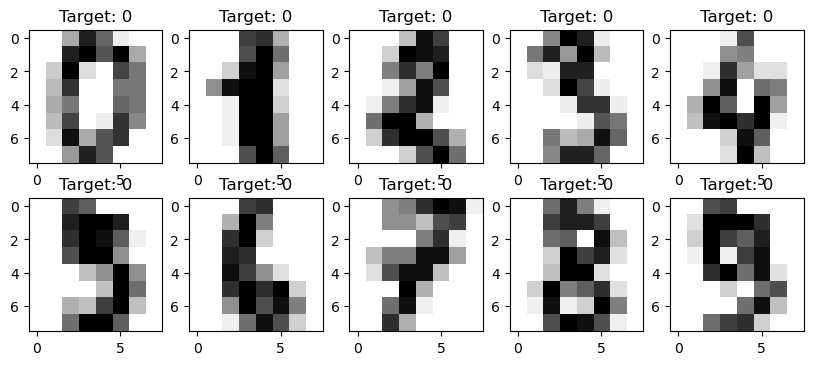

C:\Users\Eskillman\AppData\Local\Temp\ipykernel_18636\3922585080.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(compressed[:, 0], compressed[:, 1], c=classifiedData, cmap=plt.cm.get_cmap('jet', 10))


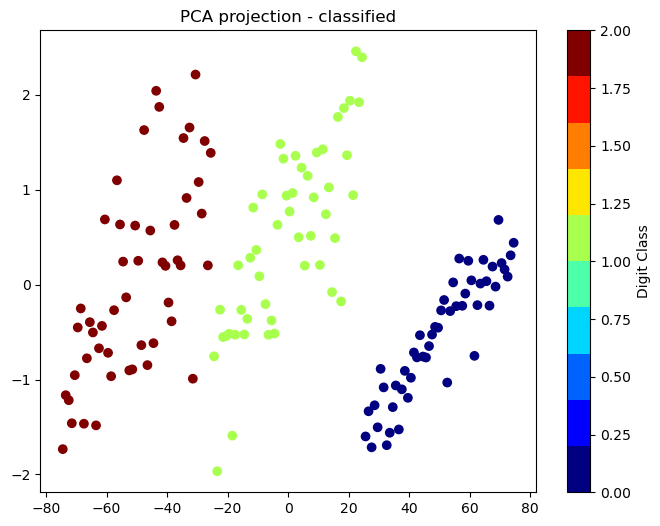

In [91]:
import matplotlib . pyplot as plt
import numpy as np
from sklearn . decomposition import PCA
from sklearn . datasets import load_digits
from sklearn . neighbors import KNeighborsClassifier

# Load the data
digits = load_digits ()
# Extract the three parts of the data .
data = digits . data
images = digits . images
target = digits . target


# Project the data into two dimensions using PCA .
pca = PCA ( n_components =2)
compressed = pca . fit_transform ( inputs )

# Train the classifier .
classifier = KNeighborsClassifier ( n_neighbors = 1 )
classifier . fit ( inputs , targets )
classifiedData = classifier . predict ( inputs )

# Plot some example images
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) 
for i, (image, target) in enumerate(zip(images[:10], targets[:10])): 
    axes[i // 5, i % 5].imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') 
    axes[i // 5, i % 5].set_title(f'Target: {target}') 
plt.show()

plt.figure(figsize=(8, 6)) 
plt.scatter(compressed[:, 0], compressed[:, 1], c=classifiedData, cmap=plt.cm.get_cmap('jet', 10)) 
plt.title("PCA projection - classified") 
plt.colorbar(label='Digit Class') 
plt.show()